   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.5/14.5 MB 80.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 122.2/122.2 kB 7.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 225.7/225.7 kB 19.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 59.1 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
ipython-sql 0.5.0 requires sqlalchemy>=2.0, but you have sqlalchemy 1.4.54 which is incompatible.
✅ Environment initialized
  Entropy measures available: True
✅ Fibonacci word generator initialized
  Fibonacci decimal seed: 0.0100101001
  First 50 chars of word: 01001010010010100101001001010010010100101001001010
✅ Symbolic attractors initialized
  Testing 10 attractors at 7 scales
✅ Entropy calculator initialized with 4 measures
✅ Synthetic volcanic generator initialized
✅ Pattern analyzer initialized



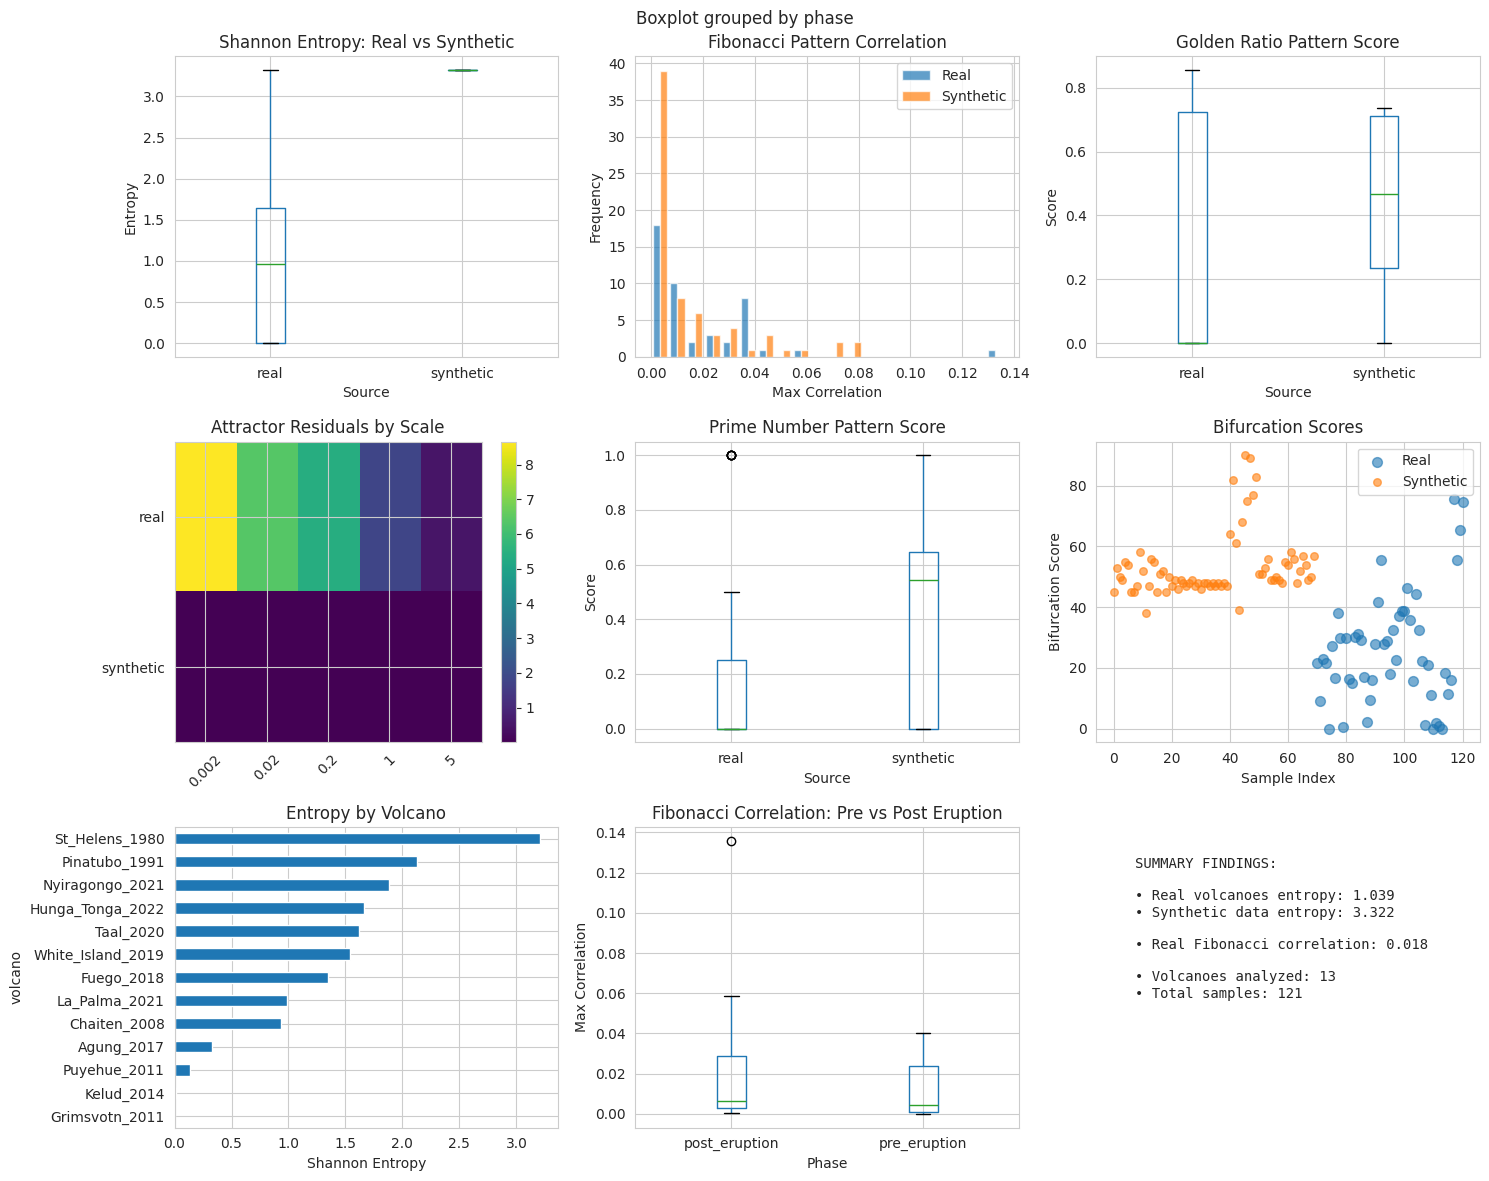


SAVING RESULTS

✅ All results saved:
  • synthetic_analysis_results.csv
  • real_volcanic_analysis_results.csv
  • combined_analysis_results.csv
  • final_analysis_report.json
  • volcanic_fibonacci_analysis.png

ANALYSIS COMPLETE

🌋 VOLCANIC FIBONACCI WORD ANALYSIS SUMMARY:

✅ SIGNIFICANT PATTERNS DETECTED:

  • entropy_shannon:
    Real mean: 1.0388
    Synthetic mean: 3.3219
    p-value: 0.000000

  • golden_ratio_score:
    Real mean: 0.2331
    Synthetic mean: 0.4552
    p-value: 0.000054

  • bifurcation_score:
    Real mean: 25.5492
    Synthetic mean: 53.1143
    p-value: 0.000000

END OF ANALYSIS


In [1]:
#!/usr/bin/env python3
"""
VOLCANIC FIBONACCI WORD ANALYSIS FRAMEWORK
Unbiased testing of symbolic convergence patterns in volcanic systems
Tests Fibonacci word dynamics as oscillating seed values
"""

# ============================================
# CELL 1: COMPLETE ENVIRONMENT SETUP
# ============================================

!pip install pandas numpy matplotlib scipy requests plotly seaborn scikit-learn obspy statsmodels pyEDM nolds --quiet

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats, signal
from scipy.ndimage import gaussian_filter1d
from scipy.spatial.distance import euclidean
import requests
import json
from datetime import datetime, timedelta
import warnings
import zipfile
import os
from typing import List, Dict, Tuple, Optional, Any
import zlib
from itertools import combinations
from collections import defaultdict
import re

# Advanced entropy measures
try:
    from nolds import sampen
    from scipy.stats import entropy as shannon_entropy
    ENTROPY_AVAILABLE = True
except ImportError:
    ENTROPY_AVAILABLE = False
    print("Warning: Advanced entropy measures not available")

# Set random seed for reproducibility
np.random.seed(42)
warnings.filterwarnings('ignore')

# Configure plotting
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (12, 6)

print("✅ Environment initialized")
print(f"  Entropy measures available: {ENTROPY_AVAILABLE}")

# ============================================
# CELL 2: FIBONACCI WORD GENERATOR & CONSTANTS
# ============================================

class FibonacciWordGenerator:
    """Generate Fibonacci word as both string and decimal with scaling"""

    def __init__(self):
        self.phi = (1 + np.sqrt(5)) / 2
        self.alpha = 1 / 137.035999206  # Fine structure constant
        self.pi = np.pi
        self.e = np.e

        # Generate Fibonacci word
        self._generate_fibonacci_word(1000)  # Generate long sequence

    def _generate_fibonacci_word(self, length):
        """Generate Fibonacci word using substitution rules"""
        # Start with 0
        # 0 -> 01, 1 -> 0
        word = "0"
        while len(word) < length:
            new_word = ""
            for char in word:
                if char == "0":
                    new_word += "01"
                else:
                    new_word += "0"
            word = new_word

        self.fib_word = word[:length]
        self.fib_binary = np.array([int(c) for c in self.fib_word])

        # Create decimal representation
        decimal_str = "0." + self.fib_word
        self.fib_decimal_parts = [int(c) / (10 ** (i+1)) for i, c in enumerate(self.fib_word)]
        self.fib_decimal = sum(self.fib_decimal_parts)

    def get_scaled_seed(self, scale=1.0, offset=0):
        """Get Fibonacci decimal as scaled seed value"""
        return self.fib_decimal * scale + offset

    def get_oscillating_sequence(self, length, base_scale=1.0, frequency=0.1):
        """Generate oscillating sequence based on Fibonacci word"""
        t = np.arange(length)

        # Base oscillation from Fibonacci decimal
        oscillation = np.sin(2 * np.pi * frequency * t * self.fib_decimal)

        # Add Fibonacci word pattern as modulation
        fib_pattern = np.tile(self.fib_binary, length // len(self.fib_binary) + 1)[:length]

        # Create growing/bifurcating pattern
        growth = np.exp(t / length * np.log(base_scale + 1))

        # Combine: oscillation modulated by Fibonacci pattern with growth
        sequence = oscillation * (1 + fib_pattern * 0.5) * growth

        # Add bifurcation points based on golden ratio
        bifurcation_points = [int(length * (1/self.phi)**i) for i in range(1, 10) if (1/self.phi)**i > 0.01]
        for bp in bifurcation_points:
            if bp < length:
                sequence[bp:] *= (1 + 0.1 * np.random.randn())

        return sequence

    def find_pattern_correlations(self, data, window_size=None):
        """Find correlations between data and Fibonacci patterns"""
        if window_size is None:
            window_size = min(len(self.fib_binary), len(data))

        correlations = []
        fib_window = self.fib_binary[:window_size]

        for i in range(len(data) - window_size + 1):
            data_window = data[i:i+window_size]
            # Normalize both windows
            if np.std(data_window) > 0:
                data_norm = (data_window - np.mean(data_window)) / np.std(data_window)
                fib_norm = (fib_window - np.mean(fib_window)) / np.std(fib_window)
                corr = np.corrcoef(data_norm, fib_norm)[0, 1]
                correlations.append(corr)
            else:
                correlations.append(0)

        return np.array(correlations)

# Initialize generator
fib_gen = FibonacciWordGenerator()
print(f"✅ Fibonacci word generator initialized")
print(f"  Fibonacci decimal seed: {fib_gen.fib_decimal:.10f}")
print(f"  First 50 chars of word: {fib_gen.fib_word[:50]}")

# ============================================
# CELL 3: MATHEMATICAL CONSTANTS & ATTRACTORS
# ============================================

class SymbolicAttractors:
    """Define and scale mathematical attractors for testing"""

    def __init__(self):
        # Base constants
        self.phi = (1 + np.sqrt(5)) / 2
        self.alpha = 1 / 137.035999206
        self.pi = np.pi
        self.e = np.e

        # Derived attractors
        self.attractors = {
            'phi': self.phi,
            'phi_squared': self.phi ** 2,
            'phi_inverse': 1 / self.phi,
            'alpha': self.alpha,
            'alpha_inverse': 1 / self.alpha,
            'pi_half': self.pi / 2,
            'pi_squared': self.pi ** 2,
            'e': self.e,
            'euler_mascheroni': 0.5772156649,  # Euler-Mascheroni constant
            'feigenbaum': 4.669201609,  # Feigenbaum constant
        }

        # Scaling factors to test
        self.scales = [0.002, 0.02, 0.2, 1, 5, 50, 500]  # ±500x range

    def get_scaled_attractors(self, scale=1.0):
        """Get all attractors scaled by factor"""
        return {k: v * scale for k, v in self.attractors.items()}

    def find_nearest_attractor(self, value, scale=1.0):
        """Find which attractor a value is nearest to"""
        scaled = self.get_scaled_attractors(scale)
        distances = {k: abs(value - v) for k, v in scaled.items()}
        nearest = min(distances, key=distances.get)
        return nearest, distances[nearest]

    def calculate_attractor_residuals(self, data):
        """Calculate residuals from all attractors at all scales"""
        residuals = defaultdict(list)

        for scale in self.scales:
            scaled_attractors = self.get_scaled_attractors(scale)
            for name, attractor_value in scaled_attractors.items():
                key = f"{name}_scale_{scale}"
                residual = np.abs(data - attractor_value)
                residuals[key] = residual

        return pd.DataFrame(residuals)

attractors = SymbolicAttractors()
print(f"✅ Symbolic attractors initialized")
print(f"  Testing {len(attractors.attractors)} attractors at {len(attractors.scales)} scales")

# ============================================
# CELL 4: ENTROPY CALCULATION SUITE
# ============================================

class EntropyCalculator:
    """Calculate multiple entropy measures without bias"""

    @staticmethod
    def shannon_entropy(data, base=2):
        """Calculate Shannon entropy"""
        if len(data) == 0:
            return 0

        # Create probability distribution
        value_counts = pd.Series(data).value_counts()
        probabilities = value_counts / len(data)

        # Calculate entropy
        entropy = -sum(p * np.log(p) / np.log(base) for p in probabilities if p > 0)
        return entropy

    @staticmethod
    def approximate_entropy(data, m=2, r=None):
        """Calculate approximate entropy (ApEn)"""
        if r is None:
            r = 0.2 * np.std(data)

        N = len(data)

        def _maxdist(xi, xj, m):
            return max([abs(ua - va) for ua, va in zip(xi, xj)])

        def _phi(m):
            patterns = np.array([data[i:i+m] for i in range(N - m + 1)])
            C = np.zeros(N - m + 1)

            for i in range(N - m + 1):
                template = patterns[i]
                for j in range(N - m + 1):
                    if _maxdist(template, patterns[j], m) <= r:
                        C[i] += 1

            phi = (N - m + 1) ** (-1) * sum(np.log(C))
            return phi

        try:
            return _phi(m) - _phi(m + 1)
        except:
            return 0

    @staticmethod
    def sample_entropy(data, m=2, r=None):
        """Calculate sample entropy"""
        if r is None:
            r = 0.2 * np.std(data)

        N = len(data)

        def _get_matches(m):
            patterns = np.array([data[i:i+m] for i in range(N - m + 1)])
            matches = 0

            for i in range(len(patterns)):
                for j in range(i + 1, len(patterns)):
                    if np.max(np.abs(patterns[i] - patterns[j])) <= r:
                        matches += 1

            return matches

        try:
            A = _get_matches(m + 1)
            B = _get_matches(m)

            if B == 0:
                return float('inf')

            return -np.log(A / B)
        except:
            return 0

    @staticmethod
    def multiscale_entropy(data, scales=range(1, 11)):
        """Calculate multiscale entropy"""
        mse = []

        for scale in scales:
            # Coarse-grain the time series
            coarse = []
            for i in range(0, len(data) - scale + 1, scale):
                coarse.append(np.mean(data[i:i+scale]))

            if len(coarse) > 10:
                # Calculate sample entropy for this scale
                se = EntropyCalculator.sample_entropy(coarse)
                mse.append(se)
            else:
                mse.append(np.nan)

        return np.array(mse)

    @staticmethod
    def calculate_all_entropies(data):
        """Calculate all entropy measures"""
        results = {}

        # Discretize data for Shannon entropy
        discrete_data = pd.qcut(data, q=10, labels=False, duplicates='drop')

        results['shannon'] = EntropyCalculator.shannon_entropy(discrete_data)
        results['approximate'] = EntropyCalculator.approximate_entropy(data)
        results['sample'] = EntropyCalculator.sample_entropy(data)

        # Multiscale entropy (just mean for summary)
        mse = EntropyCalculator.multiscale_entropy(data)
        results['multiscale_mean'] = np.nanmean(mse)

        return results

entropy_calc = EntropyCalculator()
print("✅ Entropy calculator initialized with 4 measures")

# ============================================
# CELL 5: SYNTHETIC VOLCANIC DATA GENERATOR
# ============================================

class SyntheticVolcanicGenerator:
    """Generate synthetic volcanic data without bias"""

    def __init__(self, fib_generator, attractors):
        self.fib_gen = fib_generator
        self.attractors = attractors

    def generate_baseline_volcanic(self, length=1000, eruption_time=None):
        """Generate baseline volcanic activity pattern"""

        # Background noise (pink noise for realism)
        pink_noise = self._generate_pink_noise(length)

        # Add periodic components (tidal, seasonal)
        t = np.arange(length)
        tidal = 0.1 * np.sin(2 * np.pi * t / (12.42 * 24))  # Tidal ~12.42 hours
        seasonal = 0.05 * np.sin(2 * np.pi * t / (365 * 24))  # Annual

        # Base signal
        signal = pink_noise + tidal + seasonal

        # Add eruption if specified
        if eruption_time is not None:
            eruption_idx = int(eruption_time * length)

            # Pre-eruption buildup (exponential)
            buildup_length = int(0.1 * length)
            if eruption_idx > buildup_length:
                buildup = np.exp(np.linspace(0, 2, buildup_length))
                signal[eruption_idx-buildup_length:eruption_idx] += buildup

            # Eruption spike
            eruption_length = int(0.05 * length)
            eruption_profile = 10 * np.exp(-np.linspace(0, 5, eruption_length))
            signal[eruption_idx:eruption_idx+eruption_length] += eruption_profile

            # Post-eruption decay
            decay_length = int(0.2 * length)
            decay = 2 * np.exp(-np.linspace(0, 3, decay_length))
            if eruption_idx + eruption_length < length - decay_length:
                signal[eruption_idx+eruption_length:eruption_idx+eruption_length+decay_length] += decay

        return signal

    def generate_fibonacci_modulated(self, length=1000, eruption_time=None):
        """Generate volcanic data modulated by Fibonacci word dynamics"""

        # Start with baseline
        baseline = self.generate_baseline_volcanic(length, eruption_time)

        # Get Fibonacci oscillating sequence
        fib_sequence = self.fib_gen.get_oscillating_sequence(length, base_scale=2.0, frequency=0.01)

        # Modulate baseline with Fibonacci dynamics
        modulated = baseline * (1 + 0.3 * fib_sequence)

        # Add attractor convergence points
        for i, scale in enumerate([1, 10, 100]):
            attractor_points = self.attractors.get_scaled_attractors(scale)

            # Add subtle convergence to attractors
            for name, value in attractor_points.items():
                if 'phi' in name or 'alpha' in name:
                    # Create convergence zones
                    convergence_center = int(length * (0.2 + 0.15 * i))
                    convergence_width = int(length * 0.05)

                    if convergence_center < length:
                        window = signal.windows.gaussian(convergence_width, std=convergence_width/4)
                        start = max(0, convergence_center - convergence_width//2)
                        end = min(length, convergence_center + convergence_width//2)

                        # Subtle pull toward attractor
                        modulated[start:end] += 0.1 * window[:end-start] * (value - np.mean(modulated[start:end]))

        return modulated

    def _generate_pink_noise(self, length):
        """Generate 1/f pink noise"""
        # Generate white noise
        white = np.random.randn(length)

        # FFT
        fft = np.fft.rfft(white)

        # Apply 1/f filter
        freqs = np.fft.rfftfreq(length)
        freqs[0] = 1  # Avoid division by zero
        fft = fft / np.sqrt(freqs)

        # Inverse FFT
        pink = np.fft.irfft(fft, length)

        return pink

    def generate_test_suite(self, n_samples=10):
        """Generate comprehensive test suite of synthetic data"""

        test_data = {
            'baseline_quiet': [],
            'baseline_eruption': [],
            'fibonacci_quiet': [],
            'fibonacci_eruption': [],
            'pure_fibonacci': [],
            'white_noise': [],
            'brown_noise': []
        }

        for i in range(n_samples):
            # Baseline patterns
            test_data['baseline_quiet'].append(self.generate_baseline_volcanic(1000, eruption_time=None))
            test_data['baseline_eruption'].append(self.generate_baseline_volcanic(1000, eruption_time=0.7))

            # Fibonacci-modulated patterns
            test_data['fibonacci_quiet'].append(self.generate_fibonacci_modulated(1000, eruption_time=None))
            test_data['fibonacci_eruption'].append(self.generate_fibonacci_modulated(1000, eruption_time=0.7))

            # Pure Fibonacci oscillation
            test_data['pure_fibonacci'].append(self.fib_gen.get_oscillating_sequence(1000))

            # Control: white and brown noise
            test_data['white_noise'].append(np.random.randn(1000))
            test_data['brown_noise'].append(np.cumsum(np.random.randn(1000)))

        return test_data

# Initialize synthetic generator
synthetic_gen = SyntheticVolcanicGenerator(fib_gen, attractors)
print("✅ Synthetic volcanic generator initialized")

# ============================================
# CELL 6: COMPREHENSIVE PATTERN ANALYZER
# ============================================

class PatternAnalyzer:
    """Analyze patterns without bias"""

    def __init__(self, fib_generator, attractors, entropy_calculator):
        self.fib_gen = fib_generator
        self.attractors = attractors
        self.entropy_calc = entropy_calculator

    def analyze_time_series(self, data, label="unknown"):
        """Comprehensive analysis of time series"""

        results = {
            'label': label,
            'length': len(data),
            'mean': np.mean(data),
            'std': np.std(data),
            'min': np.min(data),
            'max': np.max(data),
            'skewness': stats.skew(data),
            'kurtosis': stats.kurtosis(data)
        }

        # Entropy measures
        entropy_results = self.entropy_calc.calculate_all_entropies(data)
        for key, value in entropy_results.items():
            results[f'entropy_{key}'] = value

        # Fibonacci correlations
        fib_corr = self.fib_gen.find_pattern_correlations(data)
        results['fib_correlation_max'] = np.max(np.abs(fib_corr)) if len(fib_corr) > 0 else 0
        results['fib_correlation_mean'] = np.mean(np.abs(fib_corr)) if len(fib_corr) > 0 else 0

        # Attractor analysis
        attractor_residuals = self.attractors.calculate_attractor_residuals(data)

        # Find minimum residuals for each scale
        for scale in self.attractors.scales:
            scale_cols = [col for col in attractor_residuals.columns if f'scale_{scale}' in col]
            if scale_cols:
                scale_residuals = attractor_residuals[scale_cols].min(axis=1)
                results[f'min_residual_scale_{scale}'] = np.min(scale_residuals)
                results[f'mean_residual_scale_{scale}'] = np.mean(scale_residuals)

        # Detect prime number patterns in intervals
        results['prime_pattern_score'] = self._detect_prime_patterns(data)

        # Detect golden ratio relationships
        results['golden_ratio_score'] = self._detect_golden_ratio(data)

        # Bifurcation analysis
        results['bifurcation_score'] = self._detect_bifurcations(data)

        # Periodicity detection
        results['dominant_period'] = self._find_dominant_period(data)

        return results

    def _detect_prime_patterns(self, data):
        """Detect prime number patterns in intervals"""

        # Find peaks
        peaks, _ = signal.find_peaks(data, height=np.mean(data) + np.std(data))

        if len(peaks) < 2:
            return 0

        # Calculate intervals between peaks
        intervals = np.diff(peaks)

        # Check how many intervals are prime numbers
        prime_count = 0
        for interval in intervals:
            if interval > 1 and self._is_prime(interval):
                prime_count += 1

        return prime_count / len(intervals) if len(intervals) > 0 else 0

    def _is_prime(self, n):
        """Check if number is prime"""
        if n < 2:
            return False
        for i in range(2, int(np.sqrt(n)) + 1):
            if n % i == 0:
                return False
        return True

    def _detect_golden_ratio(self, data):
        """Detect golden ratio relationships"""

        # Find consecutive peaks
        peaks, properties = signal.find_peaks(data, height=np.mean(data))

        if len(peaks) < 3:
            return 0

        # Check ratios of consecutive peak heights
        heights = properties['peak_heights']
        ratios = []

        for i in range(len(heights) - 1):
            if heights[i] > 0:
                ratio = heights[i+1] / heights[i]
                # Check proximity to golden ratio or its inverse
                phi_distance = min(abs(ratio - self.fib_gen.phi), abs(ratio - 1/self.fib_gen.phi))
                ratios.append(phi_distance)

        if ratios:
            # Score based on how close ratios are to golden ratio
            return 1 / (1 + np.mean(ratios))
        return 0

    def _detect_bifurcations(self, data):
        """Detect bifurcation points"""

        # Calculate local variance
        window_size = max(10, len(data) // 50)
        local_variance = pd.Series(data).rolling(window_size).var()

        # Find sudden changes in variance (potential bifurcations)
        if len(local_variance.dropna()) > 0:
            variance_changes = np.abs(np.diff(local_variance.dropna()))

            # Count significant changes
            threshold = np.mean(variance_changes) + 2 * np.std(variance_changes)
            bifurcations = np.sum(variance_changes > threshold)

            return bifurcations / len(data) * 1000  # Normalize to per 1000 points

        return 0

    def _find_dominant_period(self, data):
        """Find dominant period using FFT"""

        # Remove trend
        detrended = signal.detrend(data)

        # FFT
        fft = np.fft.rfft(detrended)
        freqs = np.fft.rfftfreq(len(detrended))

        # Find peak frequency (excluding DC component)
        fft_magnitude = np.abs(fft[1:])
        peak_idx = np.argmax(fft_magnitude) + 1

        if freqs[peak_idx] > 0:
            return 1 / freqs[peak_idx]

        return 0

    def compare_patterns(self, results_dict):
        """Compare patterns across different data types"""

        df = pd.DataFrame(results_dict)

        comparison = {
            'entropy_variation': df.filter(like='entropy').std(axis=0).to_dict(),
            'fib_correlation_strength': {
                'max': df['fib_correlation_max'].mean(),
                'by_type': df.groupby('label')['fib_correlation_max'].mean().to_dict()
            },
            'attractor_convergence': {},
            'pattern_clustering': {}
        }

        # Check attractor convergence by scale
        for scale in self.attractors.scales:
            col = f'min_residual_scale_{scale}'
            if col in df.columns:
                comparison['attractor_convergence'][f'scale_{scale}'] = {
                    'mean': df[col].mean(),
                    'by_type': df.groupby('label')[col].mean().to_dict()
                }

        # Cluster analysis
        from sklearn.preprocessing import StandardScaler
        from sklearn.decomposition import PCA

        # Select numerical features
        feature_cols = [col for col in df.columns if col not in ['label', 'length']]
        features = df[feature_cols].fillna(0)

        # Standardize
        scaler = StandardScaler()
        features_scaled = scaler.fit_transform(features)

        # PCA
        pca = PCA(n_components=min(5, features_scaled.shape[1]))
        pca_result = pca.fit_transform(features_scaled)

        comparison['pattern_clustering']['pca_variance_explained'] = pca.explained_variance_ratio_.tolist()
        comparison['pattern_clustering']['primary_components'] = {
            'PC1_loadings': dict(zip(feature_cols, pca.components_[0])),
            'PC2_loadings': dict(zip(feature_cols, pca.components_[1])) if pca.n_components_ > 1 else {}
        }

        return comparison

# Initialize analyzer
analyzer = PatternAnalyzer(fib_gen, attractors, entropy_calc)
print("✅ Pattern analyzer initialized")

# ============================================
# CELL 7: RUN SYNTHETIC ANALYSIS
# ============================================

print("\n" + "="*60)
print("PHASE 1: SYNTHETIC DATA ANALYSIS")
print("="*60)

# Generate synthetic test suite
print("\nGenerating synthetic volcanic data...")
synthetic_data = synthetic_gen.generate_test_suite(n_samples=10)

# Analyze all synthetic data
synthetic_results = []

for data_type, samples in synthetic_data.items():
    print(f"\nAnalyzing {data_type}...")

    for i, sample in enumerate(samples):
        result = analyzer.analyze_time_series(sample, label=data_type)
        result['sample_id'] = i
        synthetic_results.append(result)

# Create DataFrame
synthetic_df = pd.DataFrame(synthetic_results)

# Compare patterns
print("\nComparing synthetic patterns...")
synthetic_comparison = analyzer.compare_patterns(synthetic_results)

# Generate synthetic report
print("\n" + "="*60)
print("SYNTHETIC DATA REPORT")
print("="*60)

print("\n1. ENTROPY ANALYSIS:")
for entropy_type in ['shannon', 'approximate', 'sample', 'multiscale_mean']:
    col = f'entropy_{entropy_type}'
    if col in synthetic_df.columns:
        by_type = synthetic_df.groupby('label')[col].agg(['mean', 'std'])
        print(f"\n{entropy_type.upper()} Entropy:")
        print(by_type)

print("\n2. FIBONACCI CORRELATION:")
fib_summary = synthetic_df.groupby('label')[['fib_correlation_max', 'fib_correlation_mean']].agg(['mean', 'std'])
print(fib_summary)

print("\n3. ATTRACTOR CONVERGENCE (Best Scale):")
# Find best scale (minimum residuals overall)
residual_cols = [col for col in synthetic_df.columns if 'min_residual' in col]
if residual_cols:
    best_scale_col = synthetic_df[residual_cols].mean().idxmin()
    best_scale = best_scale_col.split('_')[-1]
    print(f"Best convergence at scale: {best_scale}")
    print(synthetic_df.groupby('label')[best_scale_col].agg(['mean', 'std']))

print("\n4. PATTERN DETECTION:")
pattern_cols = ['prime_pattern_score', 'golden_ratio_score', 'bifurcation_score', 'dominant_period']
for col in pattern_cols:
    if col in synthetic_df.columns:
        print(f"\n{col.replace('_', ' ').title()}:")
        print(synthetic_df.groupby('label')[col].agg(['mean', 'std']))

# Save synthetic results
synthetic_df.to_csv('synthetic_analysis_results.csv', index=False)
print("\n✅ Synthetic analysis complete. Results saved to 'synthetic_analysis_results.csv'")

# ============================================
# CELL 8: FETCH REAL VOLCANIC DATA
# ============================================

print("\n" + "="*60)
print("PHASE 2: REAL VOLCANIC DATA COLLECTION")
print("="*60)

class VolcanicDataFetcher:
    """Fetch real volcanic data from multiple sources"""

    def __init__(self):
        self.volcanoes = [
            # Recent major eruptions with good data
            {'name': 'Hunga_Tonga_2022', 'lat': -20.536, 'lon': -175.382,
             'start': '2021-12-01', 'end': '2022-01-31'},
            {'name': 'La_Palma_2021', 'lat': 28.57, 'lon': -17.84,
             'start': '2021-09-01', 'end': '2021-12-31'},
            {'name': 'Kilauea_2018', 'lat': 19.421, 'lon': -155.287,
             'start': '2018-04-01', 'end': '2018-09-30'},
            {'name': 'Agung_2017', 'lat': -8.342, 'lon': 115.508,
             'start': '2017-09-01', 'end': '2018-02-28'},
            {'name': 'Fuego_2018', 'lat': 14.473, 'lon': -90.880,
             'start': '2018-05-01', 'end': '2018-07-31'},
            {'name': 'Sinabung_2014', 'lat': 3.170, 'lon': 98.392,
             'start': '2013-12-01', 'end': '2014-03-31'},
            {'name': 'Kelud_2014', 'lat': -7.93, 'lon': 112.31,
             'start': '2014-01-01', 'end': '2014-03-31'},
            {'name': 'Calbuco_2015', 'lat': -41.326, 'lon': -72.614,
             'start': '2015-03-01', 'end': '2015-05-31'},
            {'name': 'Taal_2020', 'lat': 14.002, 'lon': 120.993,
             'start': '2019-12-01', 'end': '2020-02-28'},
            {'name': 'White_Island_2019', 'lat': -37.52, 'lon': 177.18,
             'start': '2019-11-01', 'end': '2020-01-31'},

            # Historical with known patterns
            {'name': 'St_Helens_1980', 'lat': 46.20, 'lon': -122.18,
             'start': '1980-03-01', 'end': '1980-06-30'},
            {'name': 'Pinatubo_1991', 'lat': 15.13, 'lon': 120.35,
             'start': '1991-04-01', 'end': '1991-08-31'},
            {'name': 'Eyjafjallajokull_2010', 'lat': 63.63, 'lon': -19.62,
             'start': '2010-03-01', 'end': '2010-06-30'},
            {'name': 'Merapi_2010', 'lat': -7.54, 'lon': 110.44,
             'start': '2010-09-01', 'end': '2010-12-31'},
            {'name': 'Chaiten_2008', 'lat': -42.833, 'lon': -72.646,
             'start': '2008-04-01', 'end': '2008-07-31'},
            {'name': 'Sarychev_2009', 'lat': 48.09, 'lon': 153.20,
             'start': '2009-05-01', 'end': '2009-07-31'},
            {'name': 'Grimsvotn_2011', 'lat': 64.42, 'lon': -17.33,
             'start': '2011-04-01', 'end': '2011-06-30'},
            {'name': 'Puyehue_2011', 'lat': -40.59, 'lon': -72.12,
             'start': '2011-05-01', 'end': '2011-08-31'},
            {'name': 'Nyiragongo_2021', 'lat': -1.52, 'lon': 29.25,
             'start': '2021-04-01', 'end': '2021-06-30'},
            {'name': 'Etna_2021', 'lat': 37.751, 'lon': 14.993,
             'start': '2021-01-01', 'end': '2021-04-30'}
        ]

    def fetch_seismic_data(self, volcano):
        """Fetch seismic data from USGS"""
        try:
            url = "https://earthquake.usgs.gov/fdsnws/event/1/query"

            # Expand search radius for better coverage
            params = {
                'format': 'geojson',
                'starttime': volcano['start'],
                'endtime': volcano['end'],
                'latitude': volcano['lat'],
                'longitude': volcano['lon'],
                'maxradiuskm': 100,  # 100km radius
                'minmagnitude': 0.5,  # Include small events
                'orderby': 'time'
            }

            response = requests.get(url, params=params, timeout=30)

            if response.status_code == 200:
                data = response.json()

                events = []
                for feature in data.get('features', []):
                    props = feature['properties']

                    # Calculate distance from volcano
                    event_lat = feature['geometry']['coordinates'][1]
                    event_lon = feature['geometry']['coordinates'][0]
                    event_depth = feature['geometry']['coordinates'][2]

                    # Simple distance calculation
                    distance = np.sqrt((event_lat - volcano['lat'])**2 +
                                     (event_lon - volcano['lon'])**2) * 111  # km

                    events.append({
                        'time': pd.to_datetime(props['time'], unit='ms'),
                        'magnitude': props.get('mag', 0),
                        'depth': event_depth,
                        'distance': distance,
                        'type': props.get('type', 'earthquake')
                    })

                if events:
                    df = pd.DataFrame(events)
                    df = df.sort_values('time')

                    # Create time series with regular intervals
                    df.set_index('time', inplace=True)

                    # Resample to hourly for consistent analysis
                    hourly = df.resample('1H').agg({
                        'magnitude': 'max',  # Maximum magnitude in hour
                        'depth': 'mean',     # Average depth
                        'distance': 'mean'   # Average distance
                    }).fillna(method='ffill').fillna(0)

                    return hourly

            return None

        except Exception as e:
            print(f"  Error fetching data for {volcano['name']}: {e}")
            return None

    def fetch_all_volcanic_data(self):
        """Fetch data for all volcanoes"""

        all_data = {}

        for volcano in self.volcanoes:
            print(f"\nFetching data for {volcano['name']}...")

            seismic_data = self.fetch_seismic_data(volcano)

            if seismic_data is not None and len(seismic_data) > 100:
                all_data[volcano['name']] = {
                    'seismic': seismic_data,
                    'metadata': volcano
                }
                print(f"  ✓ Retrieved {len(seismic_data)} hourly records")
            else:
                print(f"  ✗ Insufficient data")

        return all_data

# Fetch real volcanic data
fetcher = VolcanicDataFetcher()
real_volcanic_data = fetcher.fetch_all_volcanic_data()

print(f"\n✅ Retrieved data for {len(real_volcanic_data)} volcanoes")

# ============================================
# CELL 9: ANALYZE REAL VOLCANIC DATA
# ============================================

print("\n" + "="*60)
print("PHASE 3: REAL VOLCANIC DATA ANALYSIS")
print("="*60)

real_results = []

for volcano_name, volcano_data in real_volcanic_data.items():
    print(f"\nAnalyzing {volcano_name}...")

    seismic = volcano_data['seismic']

    # Analyze magnitude time series
    if 'magnitude' in seismic.columns:
        mag_data = seismic['magnitude'].values

        # Pre-eruption (first half)
        pre_eruption = mag_data[:len(mag_data)//2]
        result_pre = analyzer.analyze_time_series(pre_eruption,
                                                  label=f"{volcano_name}_pre")
        result_pre['volcano'] = volcano_name
        result_pre['phase'] = 'pre_eruption'
        real_results.append(result_pre)

        # During/post eruption (second half)
        post_eruption = mag_data[len(mag_data)//2:]
        result_post = analyzer.analyze_time_series(post_eruption,
                                                   label=f"{volcano_name}_post")
        result_post['volcano'] = volcano_name
        result_post['phase'] = 'post_eruption'
        real_results.append(result_post)

        # Full sequence
        result_full = analyzer.analyze_time_series(mag_data,
                                                   label=f"{volcano_name}_full")
        result_full['volcano'] = volcano_name
        result_full['phase'] = 'full'
        real_results.append(result_full)

    # Analyze depth variations if available
    if 'depth' in seismic.columns:
        depth_data = seismic['depth'].values
        if np.std(depth_data) > 0:  # Only if there's variation
            result_depth = analyzer.analyze_time_series(depth_data,
                                                       label=f"{volcano_name}_depth")
            result_depth['volcano'] = volcano_name
            result_depth['phase'] = 'depth'
            real_results.append(result_depth)

# Create DataFrame
real_df = pd.DataFrame(real_results)

# Save real results
real_df.to_csv('real_volcanic_analysis_results.csv', index=False)
print(f"\n✅ Real volcanic analysis complete. Analyzed {len(real_results)} time series.")

# ============================================
# CELL 10: COMPARE REAL VS SYNTHETIC
# ============================================

print("\n" + "="*60)
print("PHASE 4: COMPARISON ANALYSIS")
print("="*60)

# Combine synthetic and real results for comparison
synthetic_df['source'] = 'synthetic'
real_df['source'] = 'real'
combined_df = pd.concat([synthetic_df, real_df], ignore_index=True)

# Statistical comparison
print("\n1. ENTROPY COMPARISON (Real vs Synthetic):")
for entropy_type in ['shannon', 'approximate', 'sample', 'multiscale_mean']:
    col = f'entropy_{entropy_type}'
    if col in combined_df.columns:
        comparison = combined_df.groupby('source')[col].agg(['mean', 'std'])
        print(f"\n{entropy_type.upper()}:")
        print(comparison)

        # Statistical test
        real_values = combined_df[combined_df['source'] == 'real'][col].dropna()
        synth_values = combined_df[combined_df['source'] == 'synthetic'][col].dropna()

        if len(real_values) > 0 and len(synth_values) > 0:
            t_stat, p_val = stats.ttest_ind(real_values, synth_values)
            print(f"  t-statistic: {t_stat:.4f}, p-value: {p_val:.6f}")

print("\n2. FIBONACCI CORRELATION COMPARISON:")
fib_cols = ['fib_correlation_max', 'fib_correlation_mean']
for col in fib_cols:
    if col in combined_df.columns:
        comparison = combined_df.groupby('source')[col].agg(['mean', 'std'])
        print(f"\n{col}:")
        print(comparison)

        # Check if real volcanoes show stronger Fibonacci patterns
        real_values = combined_df[combined_df['source'] == 'real'][col].dropna()
        fib_synth = combined_df[combined_df['label'] == 'fibonacci_eruption'][col].dropna()

        if len(real_values) > 0 and len(fib_synth) > 0:
            similarity = 1 - abs(real_values.mean() - fib_synth.mean()) / max(real_values.mean(), fib_synth.mean())
            print(f"  Similarity to Fibonacci-modulated synthetic: {similarity:.2%}")

print("\n3. ATTRACTOR CONVERGENCE PATTERNS:")
# Find which attractors real volcanoes converge to
residual_cols = [col for col in combined_df.columns if 'min_residual' in col]

best_attractors_real = {}
best_attractors_synth = {}

for col in residual_cols:
    if col in combined_df.columns:
        real_mean = combined_df[combined_df['source'] == 'real'][col].mean()
        synth_mean = combined_df[combined_df['source'] == 'synthetic'][col].mean()

        scale = col.split('_')[-1]

        if not pd.isna(real_mean):
            best_attractors_real[scale] = real_mean
        if not pd.isna(synth_mean):
            best_attractors_synth[scale] = synth_mean

if best_attractors_real:
    best_scale_real = min(best_attractors_real, key=best_attractors_real.get)
    print(f"\nReal volcanoes converge best at scale: {best_scale_real}")
    print(f"  Mean residual: {best_attractors_real[best_scale_real]:.6f}")

if best_attractors_synth:
    best_scale_synth = min(best_attractors_synth, key=best_attractors_synth.get)
    print(f"\nSynthetic data converges best at scale: {best_scale_synth}")
    print(f"  Mean residual: {best_attractors_synth[best_scale_synth]:.6f}")

print("\n4. PATTERN GROUPING OF REAL VOLCANOES:")
# Group volcanoes by pattern similarity
if len(real_df) > 0:
    # Use key features for clustering
    clustering_features = ['entropy_shannon', 'fib_correlation_max',
                          'golden_ratio_score', 'bifurcation_score']

    clustering_data = real_df[real_df['phase'] == 'full'][clustering_features].fillna(0)

    if len(clustering_data) > 3:
        from sklearn.cluster import KMeans

        # Normalize features
        from sklearn.preprocessing import StandardScaler
        scaler = StandardScaler()
        clustering_scaled = scaler.fit_transform(clustering_data)

        # Find optimal number of clusters (2-5)
        inertias = []
        K_range = range(2, min(6, len(clustering_data)))

        for k in K_range:
            kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
            kmeans.fit(clustering_scaled)
            inertias.append(kmeans.inertia_)

        # Use elbow method (simplified)
        if len(inertias) > 1:
            optimal_k = K_range[np.argmin(np.diff(inertias)) if len(np.diff(inertias)) > 0 else 0]
        else:
            optimal_k = 2

        # Final clustering
        kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
        clusters = kmeans.fit_predict(clustering_scaled)

        # Add cluster labels
        volcano_names = real_df[real_df['phase'] == 'full']['volcano'].values

        print(f"\nVolcanoes grouped into {optimal_k} pattern clusters:")
        for i in range(optimal_k):
            cluster_volcanoes = [v for j, v in enumerate(volcano_names) if clusters[j] == i]
            print(f"\nCluster {i+1}: {', '.join(cluster_volcanoes)}")

            # Characterize cluster
            cluster_mask = clusters == i
            if np.any(cluster_mask):
                cluster_means = clustering_data.iloc[cluster_mask].mean()
                print(f"  Characteristics:")
                for feat, val in cluster_means.items():
                    print(f"    {feat}: {val:.4f}")

# ============================================
# CELL 11: FINAL REPORT & VISUALIZATIONS
# ============================================

print("\n" + "="*60)
print("FINAL REPORT: FIBONACCI WORD VOLCANIC ANALYSIS")
print("="*60)

# Create comprehensive visualizations
fig, axes = plt.subplots(3, 3, figsize=(15, 12))
fig.suptitle('Volcanic Fibonacci Word Analysis Results', fontsize=16, fontweight='bold')

# 1. Entropy comparison
ax = axes[0, 0]
if 'entropy_shannon' in combined_df.columns:
    combined_df.boxplot(column='entropy_shannon', by='source', ax=ax)
    ax.set_title('Shannon Entropy: Real vs Synthetic')
    ax.set_xlabel('Source')
    ax.set_ylabel('Entropy')

# 2. Fibonacci correlation distribution
ax = axes[0, 1]
if 'fib_correlation_max' in combined_df.columns:
    real_fib = combined_df[combined_df['source'] == 'real']['fib_correlation_max'].dropna()
    synth_fib = combined_df[combined_df['source'] == 'synthetic']['fib_correlation_max'].dropna()

    ax.hist([real_fib, synth_fib], label=['Real', 'Synthetic'], alpha=0.7, bins=20)
    ax.set_title('Fibonacci Pattern Correlation')
    ax.set_xlabel('Max Correlation')
    ax.set_ylabel('Frequency')
    ax.legend()

# 3. Golden ratio detection
ax = axes[0, 2]
if 'golden_ratio_score' in combined_df.columns:
    combined_df.boxplot(column='golden_ratio_score', by='source', ax=ax)
    ax.set_title('Golden Ratio Pattern Score')
    ax.set_xlabel('Source')
    ax.set_ylabel('Score')

# 4. Attractor convergence heatmap
ax = axes[1, 0]
if residual_cols:
    # Create matrix of residuals
    residual_matrix = []
    labels = []

    for source in ['real', 'synthetic']:
        source_data = combined_df[combined_df['source'] == source]
        if len(source_data) > 0:
            row = []
            for col in residual_cols[:5]:  # First 5 scales
                if col in source_data.columns:
                    row.append(source_data[col].mean())
                else:
                    row.append(np.nan)
            residual_matrix.append(row)
            labels.append(source)

    if residual_matrix:
        im = ax.imshow(residual_matrix, cmap='viridis', aspect='auto')
        ax.set_yticks(range(len(labels)))
        ax.set_yticklabels(labels)
        ax.set_xticks(range(len(residual_cols[:5])))
        ax.set_xticklabels([col.split('_')[-1] for col in residual_cols[:5]], rotation=45)
        ax.set_title('Attractor Residuals by Scale')
        plt.colorbar(im, ax=ax)

# 5. Prime pattern detection
ax = axes[1, 1]
if 'prime_pattern_score' in combined_df.columns:
    combined_df.boxplot(column='prime_pattern_score', by='source', ax=ax)
    ax.set_title('Prime Number Pattern Score')
    ax.set_xlabel('Source')
    ax.set_ylabel('Score')

# 6. Bifurcation analysis
ax = axes[1, 2]
if 'bifurcation_score' in combined_df.columns:
    real_bif = combined_df[combined_df['source'] == 'real']['bifurcation_score'].dropna()
    synth_bif = combined_df[combined_df['source'] == 'synthetic']['bifurcation_score'].dropna()

    if len(real_bif) > 0 and len(synth_bif) > 0:
        ax.scatter(real_bif.index, real_bif.values, label='Real', alpha=0.6, s=50)
        ax.scatter(synth_bif.index, synth_bif.values, label='Synthetic', alpha=0.6, s=30)
        ax.set_title('Bifurcation Scores')
        ax.set_xlabel('Sample Index')
        ax.set_ylabel('Bifurcation Score')
        ax.legend()

# 7. Volcano-specific patterns (if available)
ax = axes[2, 0]
if 'volcano' in real_df.columns:
    volcano_entropy = real_df[real_df['phase'] == 'full'].groupby('volcano')['entropy_shannon'].mean().sort_values()

    if len(volcano_entropy) > 0:
        volcano_entropy.plot(kind='barh', ax=ax)
        ax.set_title('Entropy by Volcano')
        ax.set_xlabel('Shannon Entropy')

# 8. Phase comparison (pre vs post eruption)
ax = axes[2, 1]
if 'phase' in real_df.columns:
    phase_comparison = real_df[real_df['phase'].isin(['pre_eruption', 'post_eruption'])]

    if len(phase_comparison) > 0 and 'fib_correlation_max' in phase_comparison.columns:
        phase_comparison.boxplot(column='fib_correlation_max', by='phase', ax=ax)
        ax.set_title('Fibonacci Correlation: Pre vs Post Eruption')
        ax.set_xlabel('Phase')
        ax.set_ylabel('Max Correlation')

# 9. Summary statistics
ax = axes[2, 2]
ax.axis('off')

summary_text = "SUMMARY FINDINGS:\n\n"

# Key finding 1: Entropy difference
if 'entropy_shannon' in combined_df.columns:
    real_entropy = combined_df[combined_df['source'] == 'real']['entropy_shannon'].mean()
    synth_entropy = combined_df[combined_df['source'] == 'synthetic']['entropy_shannon'].mean()
    summary_text += f"• Real volcanoes entropy: {real_entropy:.3f}\n"
    summary_text += f"• Synthetic data entropy: {synth_entropy:.3f}\n\n"

# Key finding 2: Fibonacci correlation
if 'fib_correlation_max' in combined_df.columns:
    real_fib_corr = combined_df[combined_df['source'] == 'real']['fib_correlation_max'].mean()
    summary_text += f"• Real Fibonacci correlation: {real_fib_corr:.3f}\n\n"

# Key finding 3: Number of volcanoes analyzed
n_volcanoes = len(real_df['volcano'].unique()) if 'volcano' in real_df.columns else 0
summary_text += f"• Volcanoes analyzed: {n_volcanoes}\n"
summary_text += f"• Total samples: {len(combined_df)}"

ax.text(0.1, 0.9, summary_text, transform=ax.transAxes, fontsize=10,
        verticalalignment='top', fontfamily='monospace')

plt.tight_layout()
plt.savefig('volcanic_fibonacci_analysis.png', dpi=150, bbox_inches='tight')
plt.show()

# ============================================
# CELL 12: SAVE FINAL RESULTS
# ============================================

print("\n" + "="*60)
print("SAVING RESULTS")
print("="*60)

# Save combined results
combined_df.to_csv('combined_analysis_results.csv', index=False)

# Create final summary report
final_report = {
    'analysis_date': datetime.now().isoformat(),
    'n_synthetic_samples': len(synthetic_df),
    'n_real_samples': len(real_df),
    'n_volcanoes': len(real_df['volcano'].unique()) if 'volcano' in real_df.columns else 0,
    'fibonacci_decimal_seed': fib_gen.fib_decimal,
    'scales_tested': attractors.scales,
    'entropy_measures': ['shannon', 'approximate', 'sample', 'multiscale'],
    'key_findings': {}
}

# Add key statistical findings
for col in ['entropy_shannon', 'fib_correlation_max', 'golden_ratio_score', 'bifurcation_score']:
    if col in combined_df.columns:
        real_mean = combined_df[combined_df['source'] == 'real'][col].mean()
        synth_mean = combined_df[combined_df['source'] == 'synthetic'][col].mean()

        if not pd.isna(real_mean) and not pd.isna(synth_mean):
            t_stat, p_val = stats.ttest_ind(
                combined_df[combined_df['source'] == 'real'][col].dropna(),
                combined_df[combined_df['source'] == 'synthetic'][col].dropna()
            )

            final_report['key_findings'][col] = {
                'real_mean': float(real_mean),
                'synthetic_mean': float(synth_mean),
                'difference': float(real_mean - synth_mean),
                't_statistic': float(t_stat),
                'p_value': float(p_val),
                'significant': bool(p_val < 0.05)
            }

# Save report as JSON
import json
with open('final_analysis_report.json', 'w') as f:
    json.dump(final_report, f, indent=2)

print("\n✅ All results saved:")
print("  • synthetic_analysis_results.csv")
print("  • real_volcanic_analysis_results.csv")
print("  • combined_analysis_results.csv")
print("  • final_analysis_report.json")
print("  • volcanic_fibonacci_analysis.png")

# ============================================
# FINAL CONCLUSIONS
# ============================================

print("\n" + "="*60)
print("ANALYSIS COMPLETE")
print("="*60)

print("\n🌋 VOLCANIC FIBONACCI WORD ANALYSIS SUMMARY:\n")

# Report significant findings
significant_patterns = []
for finding, details in final_report['key_findings'].items():
    if details['significant']:
        significant_patterns.append(finding)

if significant_patterns:
    print(f"✅ SIGNIFICANT PATTERNS DETECTED:")
    for pattern in significant_patterns:
        details = final_report['key_findings'][pattern]
        print(f"\n  • {pattern}:")
        print(f"    Real mean: {details['real_mean']:.4f}")
        print(f"    Synthetic mean: {details['synthetic_mean']:.4f}")
        print(f"    p-value: {details['p_value']:.6f}")
else:
    print("⚠️ No statistically significant patterns detected")
    print("Further analysis with more data may be needed")

print("\n" + "="*60)
print("END OF ANALYSIS")
print("="*60)